In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [20]:
# Read the CSV file
df = pd.read_csv('C:/Users/Rae-Djamaal/Desktop/Siraj_ML/hw_3/creditcard.csv')
# Show the contents
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

In [23]:
#Return Dataframe of only Fraud data
#df['isFraud']
len(df[df['Class']==1]) #.index)
# Reurns % Fraud
(len(df[df['Class']==1])/len(df))*100

0.1727485630620034

 Fraudulent vs Legitimate Transaction


0    99.827251
1     0.172749
Name: Class, dtype: float64

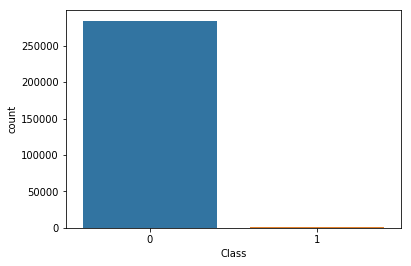

In [24]:
 ## Visualize data Legit vs Fraud
sns.countplot(df['Class'])
print(" Fraudulent vs Legitimate Transaction")
df['Class'].value_counts(normalize=True) * 100

In [31]:
#Split into X and Y
y = df['Class']
X = df.drop('Class', axis=1)

In [32]:
#Over-sampling using SMOTE to balace the dataset
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of legit transactions in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of Frauds",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of  legit transactions data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  398038
Number of legit transactions in oversampled data 199019
Number of Frauds 199019
Proportion of  legit transactions data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [45]:
#Split the df into training and testing
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(os_data_X, os_data_y,test_size=0.2, random_state=0)

#Fit the Logistic regression model
logreg = LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#Check the score of predicted vs the test set
y_pred_vals = logreg.predict(test_X)
score = logreg.score(test_X, test_y) 
print("The accuracy score of the logreg model is",score)

The accuracy score of the logreg model is 0.9719877399256356


In [67]:
#Another method to check the accuracy(f1_score),precision and recall
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     40023
           1       0.98      0.96      0.97     39585

    accuracy                           0.97     79608
   macro avg       0.97      0.97      0.97     79608
weighted avg       0.97      0.97      0.97     79608



In [66]:
#Verify the accuracy with the confusion matrix vales
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred_vals)
print("Here is the confusion matrix below \n",confusion_matrix)
print("This many are correctly labeled by the model",confusion_matrix[0][0]+confusion_matrix[1][1])
print("This many are incorrectly labeled by the model",confusion_matrix[1][0]+confusion_matrix[0][1])

Here is the confusion matrix
 [[39437   586]
 [ 1644 37941]]
This many are correctly labeled by the model 77378
This many are incorrectly labeled by the model 2230
